# UMC 203: Artificial Intelligence and Machine Learning
# Assignment 1



## Setup

**Please** run the code below *after modifying it* appropriately every time you connect to an environment.

In [60]:
# 1. Connect Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# 2. Copy the zip file into the current working directory
# Replace '/content/drive/MyDrive/AIML_A1.zip' with the correct path to your zip file
!cp '/content/drive/MyDrive/AIML_A1.zip' .

# 3. Extract the zip file
!unzip AIML_A1.zip


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  AIML_A1.zip
replace pyarmor_runtime_000000/pyarmor_runtime.so? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [61]:
import oracle as AIML_A1

## Question 1: Naive Bayes

In [195]:
# Instructions and calling conventions for the different functions

# PLEASE PROVIDE YOUR OWN SR NUMBERS TO ALL FUNCTIONS
mysrn = 22235

# q1_get_loss provides l(0,1) and l(1,0) in the setting discussed in the assignment
help(AIML_A1.q1_get_loss)
# eg:
l1, l2 = AIML_A1.q1_get_loss(mysrn)
print(f"l(0,1)={l1}, l(1,0)={l2}")

# q1_get_train_set returns a training set wih the number of required samples
help(AIML_A1.q1_get_train_set)
q1_train_data_5 = AIML_A1.q1_get_train_set(mysrn,2)
print(q1_train_data_5)

# q1_get_test_set returns the test set
help(AIML_A1.q1_get_test_set)
q1_test_data = AIML_A1.q1_get_test_set(mysrn)
len(q1_test_data)
print(q1_test_data)
len(q1_test_data)

Help on function q1_get_loss in module oracle:

q1_get_loss(srn: int) -> tuple[int, int]
    srn: 5 digit number.
    
    Returns a 2-tuple.
    The first element of the tuple is l(0,1) and the second is l(1,0)

l(0,1)=5, l(1,0)=1
Help on function q1_get_train_set in module oracle:

q1_get_train_set(srn: int, num_samples: int) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    num_samples: Number of test samples required.
    
    This function returns `num_samples' instances of data drawn from 
    the distribution described in the assignment.
    
    Returns a list whose elements are 2-tuples.
    The first element of the tuple is x and the second is the label, (1 or 0)

[(array([-1.18332,  0.05787, -1.70606, -1.36334, -3.01054]), 0.0), (array([-1.10626, -4.04241, -0.04915, -0.80319, -1.9237 ]), 0.0), (array([-0.1016 ,  0.77151, -0.51281,  2.33545, -0.03947]), 1.0), (array([-0.20113,  0.98356, -0.34654, -0.40688,  3.91396]), 1.0)]
Help on function q1_get_test_set in mo

200

In [81]:
print(len(q1_test_data))

200


In [174]:
import numpy as np

# Define the function to calculate mean and covariance matrix
def calculate_mean_and_covariance(samples):
    class_means = np.mean(samples, axis=0)
    covariance_matrix = np.cov(samples, rowvar=False)

    # Convert covariance matrix to diagonal matrix
    diagonal_covariance = np.diag(np.diag(covariance_matrix))

    return class_means, diagonal_covariance

# Initialize lists to store samples for each class
samples_0 = []
samples_1 = []

num_samples_values = [2, 10, 20, 50, 100, 500, 1000]
srn_value = 22235

for num_samples in num_samples_values:
    # Get the training set for the current num_samples
    train_set = AIML_A1.q1_get_train_set(srn_value, num_samples)

    # Extract samples and labels from train_set
    for sample, label in train_set:
        if label == 0:
            samples_0.append(sample)
        elif label == 1:
            samples_1.append(sample)

    # Convert lists to numpy arrays
    samples_array_0 = np.array(samples_0)
    samples_array_1 = np.array(samples_1)

    # Calculate mean and covariance matrix for each class
    class_means_0, covariance_matrix_0 = calculate_mean_and_covariance(samples_array_0)
    class_means_1, covariance_matrix_1 = calculate_mean_and_covariance(samples_array_1)


    # Print results
    print(f"For {num_samples} samples:")
    print("Class 0 Mean:", class_means_0)
    print("Class 0 Covariance Matrix:")
    print(covariance_matrix_0)
    print()
    print("Class 1 Mean:", class_means_1)
    print("Class 1 Covariance Matrix:")
    print(covariance_matrix_1)
    print()
    print() #just to give space between two different number of samples
    print()


For 2 samples:
Class 0 Mean: [-1.14479  -1.99227  -0.877605 -1.083265 -2.46712 ]
Class 0 Covariance Matrix:
[[2.96912180e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 8.40614804e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.37267537e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.56884011e-01
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.90610593e-01]]

Class 1 Mean: [-0.151365  0.877535 -0.429675  0.964285  1.937245]
Class 1 Covariance Matrix:
[[4.95311045e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.24826012e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.38228564e-02 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.76018691e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.81480438e+0

In [203]:
##To find the misclassification losses:
import numpy as np
def calculate_mean_and_covariance(samples):
  class_means = np.mean(samples, axis=0)

  # Calculate covariance matrix using numpy.cov
  covariance_matrix = np.cov(samples, rowvar=False)

  return class_means, covariance_matrix


def bayes_classifier(x, class_means_0, class_means_1, covariance_matrix_0, covariance_matrix_1):
  # Calculate discriminant functions
    inverse_covariance_matrix_0 = np.diag(1 / np.diag(covariance_matrix_0))
    inverse_covariance_matrix_1 = np.diag(1 / np.diag(covariance_matrix_1))
    discriminant_0 = np.dot(np.dot((x - class_means_0).T, inverse_covariance_matrix_0), (x - class_means_0))
    discriminant_1 = np.dot(np.dot((x - class_means_1).T, inverse_covariance_matrix_1), (x - class_means_1))

  # Calculate Bayes classifier
    f_x = np.log(5) - 0.5 * discriminant_1 - 0.5 * np.log(np.linalg.det(covariance_matrix_1)) \
     + 0.5 * discriminant_0 + 0.5 * np.log(np.linalg.det(covariance_matrix_0))

  # Return class prediction
    return 1 if f_x > 0 else 0



test_set = AIML_A1.q1_get_test_set(22235)
samples_0 = []
samples_1 = []

num_samples_values = [2, 10, 20, 50, 100, 500, 1000]
srn_value = 22235

train_set = AIML_A1.q1_get_train_set(srn_value, 1000)

# Extract samples and labels from train_set
for sample, label in train_set:
    if label == 0:
        samples_0.append(sample)
    elif label == 1:
        samples_1.append(sample)

    # Convert lists to numpy arrays
samples_array_0 = np.array(samples_0)
samples_array_1 = np.array(samples_1)

    # Calculate mean and covariance matrix for each class
class_means_0, covariance_matrix_0 = calculate_mean_and_covariance(samples_array_0)
class_means_1, covariance_matrix_1 = calculate_mean_and_covariance(samples_array_1)

predictions = []
for sample, actual_class in test_set:
  prediction = bayes_classifier(sample, class_means_0, class_means_1, covariance_matrix_0, covariance_matrix_1)
  predictions.append(prediction)
calculate_loss(predictions,test_set)


def calculate_loss(predictions, test_set):
  misclassification_loss = 0
  number = 0
  for i in range(len(predictions)):
    x, actual_class = test_set[i]
    predicted_class = predictions[i]

    if actual_class == 1 and predicted_class == 0:
      loss = 5
      number +=1
      misclassification_loss += loss
    elif actual_class == 0 and predicted_class == 1:
      loss = 1
      number+=1
      misclassification_loss += loss
    else:
      loss = 0
      misclassification_loss += loss
      loss+=0


  print(misclassification_loss)
  print(number)
  return misclassification_loss

46
30


## CIFAR10 classification

Help on function q1_get_cifar10_train_test in module oracle:

q1_get_cifar10_train_test(srn: int) -> tuple[list[tuple[numpy.ndarray, int]], list[tuple[numpy.ndarray, int]]]
    srn: 5 digit number.
    
    This function returns 2000 training samples each from 2 classes of the CIFAR10 dataset and a test set
    
    Returns a list whose elements are 2-tuples.
    The first element of the tuple is x and the second is the label, (1 or 0)

Files already downloaded and verified
Files already downloaded and verified


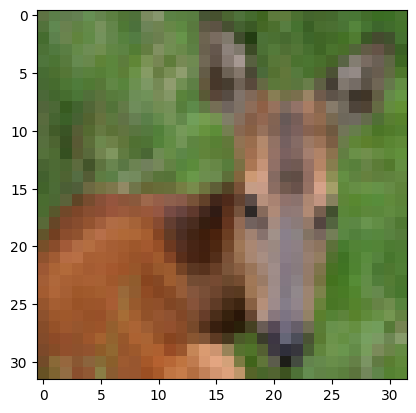

Files already downloaded and verified
Files already downloaded and verified
4000


<ipython-input-180-e705c591ae4d>:22: RuntimeWarning: divide by zero encountered in log
  f_x = np.log(5) - 0.5 * discriminant_1 - 0.5 * np.log(covariance_matrix_1_det) \
<ipython-input-180-e705c591ae4d>:23: RuntimeWarning: divide by zero encountered in log
  + 0.5 * discriminant_0 + 0.5 * np.log(covariance_matrix_0_det)
<ipython-input-180-e705c591ae4d>:22: RuntimeWarning: invalid value encountered in scalar add
  f_x = np.log(5) - 0.5 * discriminant_1 - 0.5 * np.log(covariance_matrix_1_det) \


Misclassification Loss: 10000
Test Accuracy: 0.5


In [180]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

help(AIML_A1.q1_get_cifar10_train_test)
cifar10_train, cifar10_test = AIML_A1.q1_get_cifar10_train_test(22235)

# plot an example images
plt.imshow(Image.fromarray(cifar10_train[0][0].reshape(32,32,3).astype(np.uint8)))
plt.show()

import numpy as np

def calculate_mean_and_covariance(samples):
    class_means = np.mean(samples, axis=0)
    covariance_matrix = np.cov(samples, rowvar=False)
    return class_means, covariance_matrix

def bayes_classifier(x, class_means_0, class_means_1, covariance_matrix_0_inv, covariance_matrix_1_inv, covariance_matrix_0_det, covariance_matrix_1_det):
    discriminant_0 = np.dot(np.dot((x - class_means_0).T, covariance_matrix_0_inv), (x - class_means_0))
    discriminant_1 = np.dot(np.dot((x - class_means_1).T, covariance_matrix_1_inv), (x - class_means_1))
    f_x = np.log(5) - 0.5 * discriminant_1 - 0.5 * np.log(covariance_matrix_1_det) \
          + 0.5 * discriminant_0 + 0.5 * np.log(covariance_matrix_0_det)
    return 1 if f_x > 0 else 0

def calculate_loss(predictions, test_set):
    misclassification_loss = 0
    number_of_errors = 0
    for prediction, (x, actual_class) in zip(predictions, test_set):
        if actual_class == 1 and prediction == 0:
            misclassification_loss += 5
            number_of_errors += 1
        elif actual_class == 0 and prediction == 1:
            misclassification_loss += 1
            number_of_errors += 1
    return misclassification_loss, number_of_errors

def q1_get_cifar10_train_test(srn):
    # Function to obtain CIFAR10 dataset
    pass

# Assuming you have the q1_get_cifar10_train_test function to obtain CIFAR10 dataset
train_set, test_set =  AIML_A1.q1_get_cifar10_train_test(22235)
print(len(test_set))
samples_0 = []
samples_1 = []

# Extract samples and labels from train_set
for sample, label in train_set:
    if label == 0:
        samples_0.append(sample)
    elif label == 1:
        samples_1.append(sample)

# Convert lists to numpy arrays
samples_array_0 = np.array(samples_0)
samples_array_1 = np.array(samples_1)

# Calculate mean and covariance matrix for each class
class_means_0, covariance_matrix_0 = calculate_mean_and_covariance(samples_array_0)
class_means_1, covariance_matrix_1 = calculate_mean_and_covariance(samples_array_1)

covariance_matrix_0_det = np.linalg.det(covariance_matrix_0)
covariance_matrix_1_det = np.linalg.det(covariance_matrix_1)
covariance_matrix_0_inv =  np.diag(1 / np.diag(covariance_matrix_0))
covariance_matrix_1_inv = np.diag(1 / np.diag(covariance_matrix_1))



# Use Bayes classifier to predict on test set
predictions = [bayes_classifier(x, class_means_0, class_means_1, covariance_matrix_0_inv, covariance_matrix_1_inv, covariance_matrix_0_det, covariance_matrix_1_det) for x, _ in test_set]

# Calculate misclassification loss and number of errors
misclassification_loss, number_of_errors = calculate_loss(predictions, test_set)

# Calculate test accuracy
test_accuracy = 1 - number_of_errors / len(test_set)

print("Misclassification Loss:", misclassification_loss)
print("Test Accuracy:", test_accuracy)


In [ ]:
# To save all the images, run the following code block
!mkdir class0 class1
for i,(x,y) in enumerate(cifar10_train):
  plt.imshow(Image.fromarray(x.reshape(32,32,3).astype(np.uint8)))
  plt.savefig(f"class{int(y)}/{i}.jpg")

# Question 2

In [ ]:
help(AIML_A1.q2_perceive)
perceptron_data = AIML_A1.q2_perceive(mysrn)
print(perceptron_data[:3])

Help on function q2_perceive in module oracle:

q2_perceive(srn) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    This function returns the dataset for question 2
    
    Returns a list whose elements are 2-tuples.
    The first element of the tuple is x and the second is the label, (1 or -1)

[(array([-0.4522 ,  0.66856, -0.97328, -0.147  , -0.70872]), -1.0), (array([ 1.26766, -0.70432, -0.86631, -0.01057, -0.77276]), -1.0), (array([-0.40183,  0.09853,  0.61173, -1.95735, -0.06836]), -1.0)]


In [204]:
import numpy as np

def perceptron_learning(dataset):
    # Initialize weight vector w with zeros
    w = np.zeros(dataset[0][0].shape)

    # Initialize error counter
    num_errors = 0

    # Perceptron learning algorithm
    while True:
        all_classified = True  # Flag to check if all examples are classified correctly
        for x, label in dataset:
            # Check if the current example is misclassified
            if label * np.dot(w.transpose(), x) <= 0:
                # Update weight vector
                w += label * x
                # Increment error counter
                num_errors += 1
                all_classified = False  # Set flag to False if any example is misclassified
        if all_classified:
            break  # Break out of the loop if all examples are correctly classified

    # Calculate margin using the final weight vector
    # Margin is the minimum distance from the separating hyperplane to any data point

    margin = float('inf')

    # Find the minimum value of w^T * x / ||w|| after finding w
    for x, label in dataset:
        value = (label*(np.dot(w.transpose(), x))) / np.linalg.norm(w)
        if value < margin:
            margin = value

    return w, num_errors, margin


def calculate_radius(dataset):
    max_distance = 0

    # Calculate maximum Euclidean distance from the origin
    for x, _ in dataset:
        distance = np.linalg.norm(x)
        max_distance = max(max_distance, distance)

    return max_distance

perceptron_data = AIML_A1.q2_perceive(22235)

# Call perceptron_learning function and print its results
w, num_errors, margin = perceptron_learning(perceptron_data)
print("Perceptron Learning:")
print("Weight vector (w):", w)
print("Number of errors:", num_errors)
print("Margin:", margin)


# Call calculate_radius function and print its result
radius = calculate_radius(perceptron_data)
print("\nRadius of the dataset:", radius)


Perceptron Learning:
Weight vector (w): [32.89384 32.7266  32.51577 24.58485 15.88242]
Number of errors: 1926
Margin: 0.0006139827770785612

Radius of the dataset: 4.429983960817466


Perceiving MNIST

In [ ]:
help(AIML_A1.q2_mnist)
mnist_data = AIML_A1.q2_mnist(mysrn)
print(perceptron_data[:5])

Help on function q2_mnist in module oracle:

q2_mnist(srn) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    Returns a 2-tuple.
    The first element of the tuple is l(0,1) and the second is l(1,0)



100%|██████████| 9912422/9912422 [00:00<00:00, 83381221.13it/s]


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 99782284.86it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27711562.01it/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3491665.83it/s]


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

[(array([-0.09454,  0.85408,  2.3362 , -2.04044,  0.64286]), 1.0), (array([-1.54786,  1.78158,  2.33551,  0.39075,  1.28523]), 1.0), (array([-0.53543,  1.06855,  0.23407, -0.26984, -0.86166]), -1.0), (array([-1.36385, -0.58071, -0.42002, -0.65567, -0.86643]), -1.0), (array([-0.90195, -0.35671, -1.31649, -0.46279,  0.829  ]), -1.0)]


In [206]:
import numpy as np

def perceptron_learning(dataset):
    # Initialize weight vector w with zeros
    w = np.zeros(dataset[0][0].shape)

    # Initialize error counter
    num_errors = 0

    # Perceptron learning algorithm
    while True:
        all_classified = True  # Flag to check if all examples are classified correctly
        for x, label in dataset:
            # Check if the current example is misclassified
            if label * np.dot(w.transpose(), x) <= 0:
                # Update weight vector
                w += label * x
                # Increment error counter
                num_errors += 1
                all_classified = False  # Set flag to False if any example is misclassified
        if all_classified:
            break  # Break out of the loop if all examples are correctly classified

    # Calculate margin using the final weight vector
    # Margin is the minimum distance from the separating hyperplane to any data point

    margin = float('inf')

    # Find the minimum value of w^T * x / ||w|| after finding w
    for x, label in dataset:
        value = (label*(np.dot(w.transpose(), x))) / np.linalg.norm(w)
        if value < margin:
            margin = value

    return w, num_errors, margin


def calculate_radius(dataset):
    max_distance = 0

    # Calculate maximum Euclidean distance from the origin
    for x, _ in dataset:
        distance = np.linalg.norm(x)
        max_distance = max(max_distance, distance)

    return max_distance

# Example usage with different datasets
perceptron_data = AIML_A1.q2_mnist(22235)

# Call perceptron_learning function and print its results
w, num_errors, margin = perceptron_learning(perceptron_data)
print("Perceptron Learning:")
print("Weight vector (w):", w)
print("Number of errors:", num_errors)
print("Margin:", margin)

# Call calculate_radius function and print its result
radius = calculate_radius(perceptron_data)
print("\nRadius of the dataset:", radius)

# Save the weight vector w to a CSV file
np.savetxt("AIML_2024_A1_22235_q2_w.csv", w, delimiter=",")


Perceptron Learning:
Weight vector (w): [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00

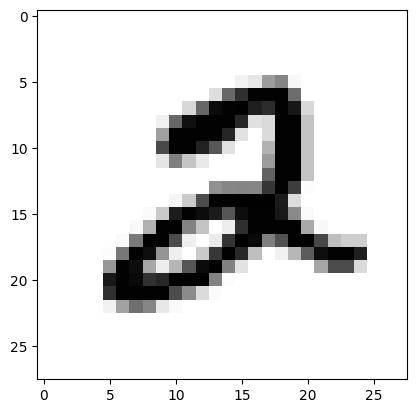

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mnist_data[0][0].reshape(28,28),cmap=plt.cm.gray_r,interpolation="nearest")

#Question 3 : Fisher Linear Discriminant

Part A : Fisher on IRIS Dataset

In [ ]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from numpy.linalg import inv

In [ ]:
# Loading Iris Dataset
iris_dataset = load_iris()
data = iris_dataset.data
label = iris_dataset.target

In [ ]:
#Preparing train dataset for setosa and vertsicolor
X_train = np.concatenate((data[0:50],data[100:150]),axis=0)
print(X_train.shape)

(100, 4)


In [ ]:
data.shape

(150, 4)

Your implementation starts here.

Do not use already available implementation of fisher discriminant from libraries like scikit-learn.

You can use numpy to perform computations and matplotlib for plotting.

In [ ]:
import numpy as np
#importing required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from numpy.linalg import inv


# Loading Iris Dataset
iris_dataset = load_iris()
data = iris_dataset.data
label = iris_dataset.target

# Prepare train dataset for setosa and versicolor
X_train = np.concatenate((data[0:50], data[100:150]), axis=0)

# Calculate mean vectors for each class
mean_setosa = np.mean(X_train[:50], axis=0)
mean_versicolor = np.mean(X_train[50:], axis=0)

# Calculate within-class scatter matrix Sw
scatter_setosa = np.dot((X_train[:50] - mean_setosa).T, (X_train[:50] - mean_setosa))
scatter_versicolor = np.dot((X_train[50:] - mean_versicolor).T, (X_train[50:] - mean_versicolor))
Sw = scatter_setosa + scatter_versicolor

# Calculate between-class scatter matrix Sb
mean_diff = mean_setosa - mean_versicolor
Sb = np.outer(mean_diff, mean_diff)

# Find w to project the data to single dimension
w = np.dot(np.linalg.inv(Sw), mean_diff)

# Normalize w
w_normalized = w / np.linalg.norm(w)

print("Normalized projection vector w:", w_normalized)



Normalized projection vector w: [ 0.28543316  0.2165812  -0.65799713 -0.66231433]


In [ ]:
#Project the data and find the threshold for classification with minimum error.
# The threshold b is the mid point of means after projection so,



# Project data onto the line defined by the projection vector w
X_train_proj = np.dot(X_train, w_normalized)

# Project class means onto the line
mean_setosa_proj = np.dot(mean_setosa, w_normalized)
mean_versicolor_proj = np.dot(mean_versicolor, w_normalized)

# Calculate threshold as the midpoint between the projections of class means
b = (mean_setosa_proj + mean_versicolor_proj) / 2

print("Threshold b:", b)


Threshold b: -0.7120525349911094


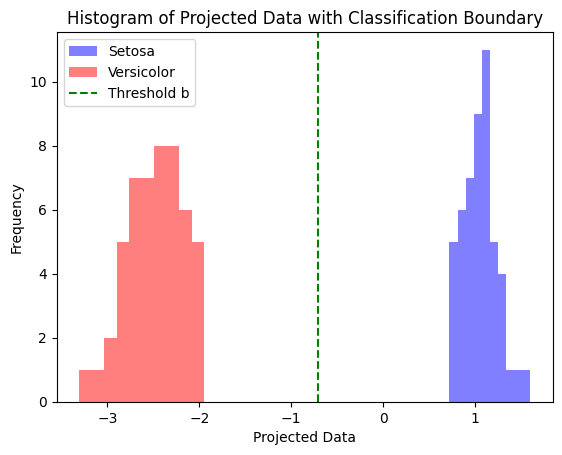

In [ ]:
#Plot the histogram of the projected data and the classification boundary.
#Use matplot lib for plotting.
#while plotting histogram give different color for different classes and also add legend.
#you can refer :- https://matplotlib.org/stable/gallery/text_labels_and_annotations/index.html

import matplotlib.pyplot as plt
import numpy as np

# Projected data
X_train_proj = np.dot(X_train, w_normalized)

# Plot histogram of projected data
plt.hist(X_train_proj[:50], color='blue', alpha=0.5, label='Setosa')
plt.hist(X_train_proj[50:], color='red', alpha=0.5, label='Versicolor')

# Plot classification boundary
plt.axvline(x=b, color='green', linestyle='--', label='Threshold b')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Projected Data')
plt.ylabel('Frequency')
plt.title('Histogram of Projected Data with Classification Boundary')

# Show plot
plt.show()



Part B: Fisher on custom Dataset

In [ ]:
#Load train Dataset
mysrn = 22235
help(AIML_A1.q3_get_data)
data_for_fisher = AIML_A1.q3_get_data(mysrn)
print(data_for_fisher[:])

Help on function q3_get_data in module oracle:

q3_get_data(srn: int) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    Help:
    This function returns the training dataset for question 4
    It returns a list containing all the data points.
    Each entry of the list is a tuple of two elements;
    the first element is the 2-dimensional data $[x_1,x_2]$,
    and the second element is the label ($1$ or $0$).

[(array([-0.06895126,  0.36145516]), 1.0), (array([-0.72896863, -0.68454711]), 0.0), (array([-0.48175367,  0.87630668]), 0.0), (array([0.2345548 , 0.28352805]), 1.0), (array([0.90482705, 0.42577929]), 0.0), (array([0.36797298, 0.        ]), 1.0), (array([-0.80901699,  0.58778525]), 0.0), (array([ 0.63742399, -0.77051324]), 0.0), (array([ 0.06279052, -0.99802673]), 0.0), (array([-0.24868989, -0.96858316]), 0.0), (array([-0.15667527, -0.3329519 ]), 1.0), (array([-0.99802673, -0.06279052]), 0.0), (array([-0.12533323, -0.9921147 ]), 0.0), (array([-0.96858316, -0.248

w_normalized: [0.74508414 0.66697048]


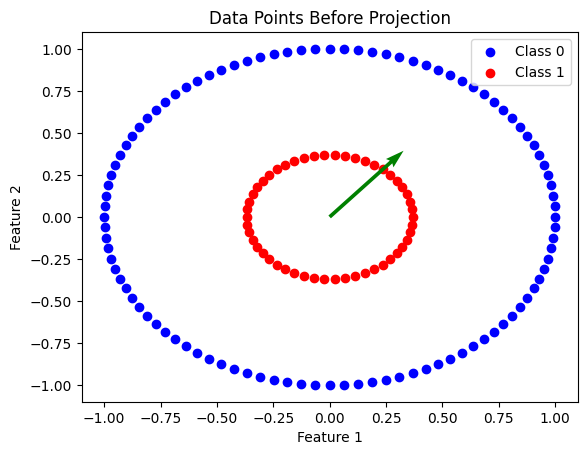

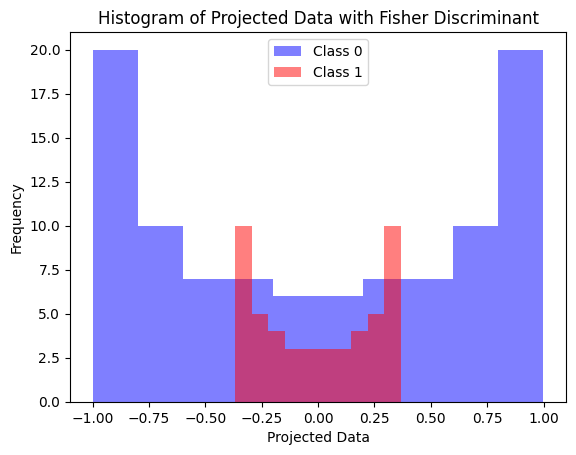

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute within-class scatter matrix Sw
def within_class_scatter(data, labels):
    unique_labels = np.unique(labels)
    Sw = np.zeros((data.shape[1], data.shape[1]))
    for label in unique_labels:
        class_data = data[labels == label]
        class_mean = np.mean(class_data, axis=0)
        diff = class_data - class_mean
        Sw += np.dot(diff.T, diff)
    return Sw

# Function to compute between-class scatter matrix Sb
def between_class_scatter(data, labels):
    unique_labels = np.unique(labels)
    total_mean = np.mean(data, axis=0)
    Sb = np.zeros((data.shape[1], data.shape[1]))
    for label in unique_labels:
        class_data = data[labels == label]
        class_mean = np.mean(class_data, axis=0)
        diff = class_mean - total_mean
        Sb += len(class_data) * np.outer(diff, diff)
    return Sb

# Load train dataset using q3_get_data function
data_for_fisher = AIML_A1.q3_get_data(22235)

# Extract data points and labels from data_for_fisher
data = np.array([x[0] for x in data_for_fisher])
labels = np.array([x[1] for x in data_for_fisher])

# Calculate Sw and Sb
Sw = within_class_scatter(data, labels)
Sb = between_class_scatter(data, labels)

# Find mean vectors for each class
mean_class1 = np.mean(data[labels == 0], axis=0)
mean_class2 = np.mean(data[labels == 1], axis=0)

# Find scatter matrices for each class
scatter_class1 = within_class_scatter(data[labels == 0], labels[labels == 0])
scatter_class2 = within_class_scatter(data[labels == 1], labels[labels == 1])

# Find projection vector w directly using the formula
w = np.dot(np.linalg.inv(Sw), (mean_class1 - mean_class2))

# Normalize the projection vector
w_normalized = w / np.linalg.norm(w)
print("w_normalized:", w_normalized)

# Project data onto w
projected_data = np.dot(data, w_normalized)
# Plot data points before projecting
plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], color='blue', label='Class 0')
plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], color='red', label='Class 1')

# Plot projection vector w
plt.quiver(0, 0, w_normalized[0], w_normalized[1], scale=5, color='green')

# Add labels and title for data points plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points Before Projection')

# Add legend for data points plot
plt.legend()

# Show plot for data points before projecting
plt.show()

# Plot histogram of projected data
plt.hist(projected_data[labels == 0], color='blue', alpha=0.5, label='Class 0')
plt.hist(projected_data[labels == 1], color='red', alpha=0.5, label='Class 1')

# Add labels and title
plt.xlabel('Projected Data')
plt.ylabel('Frequency')
plt.title('Histogram of Projected Data with Fisher Discriminant')

# Add legend
plt.legend()

# Show plot
plt.show()


From the histogram, it's clear that the data is not linearly separable.

In [230]:
import numpy as np
import matplotlib.pyplot as plt


# Function to compute within-class scatter matrix Sw
def within_class_scatter(data, labels):
    unique_labels = np.unique(labels)
    Sw = np.zeros((data.shape[1], data.shape[1]))
    for label in unique_labels:
        class_data = data[labels == label]
        class_mean = np.mean(class_data, axis=0)
        diff = class_data - class_mean
        Sw += np.dot(diff.T, diff)
    return Sw
# Load train dataset using q3_get_data function
data_for_fisher = AIML_A1.q3_get_data(22235)

# Extract data points and labels from data_for_fisher
data = np.array([x[0] for x in data_for_fisher])
labels = np.array([x[1] for x in data_for_fisher])

# Transform data to higher-dimensional space
data_class_0 = np.array(data[labels == 0])
data_class_1 = np.array(data[labels == 1])
phi_data_class0 = np.c_[data_class_0, data_class_0**2]
phi_data_class1 = np.c_[data_class_1, data_class_1**2]


# Calculate Sw and Sb for class 1
Sw_class1 = within_class_scatter(phi_data_class1, np.zeros(len(phi_data_class1)))
Sw_class0 = within_class_scatter(phi_data_class0, np.zeros(len(phi_data_class0)))
Sum_of_Sw = Sw_class0 + Sw_class1
w= np.dot(np.linalg.inv(Sum_of_Sw), (mean_class0 - mean_class1))
w_normalized = w / np.linalg.norm(w)

# Find mean vectors for each class
mean_class0 = np.mean(phi_data_class0, axis=0)
mean_class1 = np.mean(phi_data_class1, axis=0)
# Project data points onto the normalized projection vector w_normalized
projection_class0 = np.dot(phi_data_class0, w_normalized)
projection_class1 = np.dot(phi_data_class1, w_normalized)

# Find the mean projection for each class
mean_projection_class0 = np.mean(projection_class0)
mean_projection_class1 = np.mean(projection_class1)

# Calculate the threshold b as the midpoint between the mean projections
threshold_b = (mean_projection_class0 + mean_projection_class1) / 2

print("Threshold b:", threshold_b)

# Print projection vector w
print("w_normalized",w_normalized)



Threshold b: 0.40142597354547827
w_normalized [-7.98454152e-18  8.31770944e-18  7.07106781e-01  7.07106781e-01]


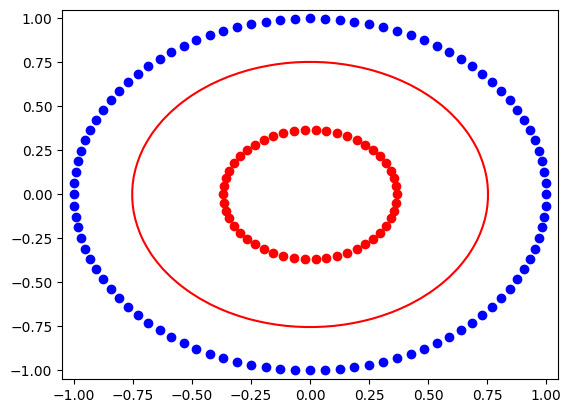

In [229]:


import numpy as np
import matplotlib.pyplot as plt


# Load train dataset using q3_get_data function
data_for_fisher = AIML_A1.q3_get_data(22235)

# Extract data points and labels from data_for_fisher
data = np.array([x[0] for x in data_for_fisher])
labels = np.array([x[1] for x in data_for_fisher])

# Transform data to higher-dimensional space
data_class_0 = np.array(data[labels == 0])
data_class_1 = np.array(data[labels == 1])

# Assuming you have defined w and threshold_b correctly

# Plot original data points
plt.scatter(phi_data_class0[:, 0], phi_data_class0[:, 1], color='blue', label='Class 0')
plt.scatter(phi_data_class1[:, 0], phi_data_class1[:, 1], color='red', label='Class 1')

x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
F = w_normalized[2]*X1**2 + w_normalized[3]*X2**2 - threshold_b
plt.contour(X1, X2, F, [0], colors='r')
plt.xlim(-1.05,1.05)
plt.ylim(-1.05,1.05)
plt.show()


In [212]:
#Load Test dataset
help(AIML_A1.q3_get_test_data)
test_data_for_fisher = AIML_A1.q3_get_test_data(mysrn)
print(test_data_for_fisher[:5])

Help on function q3_get_test_data in module oracle:

q3_get_test_data(srn: int) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    Help:This function returns the test dataset for question 4
    It returns a list containing all the data points. Each entry of the list is a tuple of two elements; 
    the first element is the 2-dimensional data $[x_1,x_2]$, and the second element is the label ($1$ or $0$).

[(array([-0.90703602, -0.13092747]), 0.0), (array([ 0.22624671, -0.23209914]), 1.0), (array([0.8957163 , 0.11293441]), 0.0), (array([0.22697082, 0.0681396 ]), 1.0), (array([-0.50297734, -0.02655685]), 1.0)]


In [217]:
#Find Test Accuracy for various values of thresholds as explained.
# Load Test dataset
help(AIML_A1.q3_get_test_data)
test_data_for_fisher = AIML_A1.q3_get_test_data(22235)
print(test_data_for_fisher[:5])

# Define thresholds
thresholds = [threshold_b - 0.3, threshold_b - 0.2, threshold_b - 0.1, threshold_b,
              threshold_b + 0.1, threshold_b + 0.2, threshold_b + 0.3]

# Define function to classify data points based on threshold
def classify_with_threshold(data, threshold):
    return 1 if threshold - np.dot(data, w_normalized) >= 0 else 0

# Calculate test accuracy for each threshold
test_accuracies = []
for threshold in thresholds:
    correct_predictions = 0
    total_predictions = len(test_data_for_fisher)
    for point, label in test_data_for_fisher:
        prediction = classify_with_threshold(transform_data(np.array([point])), threshold)
        if prediction == label:
            correct_predictions += 1
    accuracy = correct_predictions / total_predictions
    test_accuracies.append(accuracy)

# Report test accuracies as a table
import pandas as pd
threshold_table = pd.DataFrame({
    'Threshold': thresholds,
    'Test Accuracy': test_accuracies
})
print(threshold_table)




Help on function q3_get_test_data in module oracle:

q3_get_test_data(srn: int) -> list[tuple[numpy.ndarray, int]]
    srn: 5 digit number.
    
    Help:This function returns the test dataset for question 4
    It returns a list containing all the data points. Each entry of the list is a tuple of two elements; 
    the first element is the 2-dimensional data $[x_1,x_2]$, and the second element is the label ($1$ or $0$).

[(array([-0.90703602, -0.13092747]), 0.0), (array([ 0.22624671, -0.23209914]), 1.0), (array([0.8957163 , 0.11293441]), 0.0), (array([0.22697082, 0.0681396 ]), 1.0), (array([-0.50297734, -0.02655685]), 1.0)]
   Threshold  Test Accuracy
0   0.101426           0.67
1   0.201426           0.75
2   0.301426           0.80
3   0.401426           0.77
4   0.501426           0.75
5   0.601426           0.75
6   0.701426           0.75


#Question 4 : Logistic Regression

In [220]:
#Loading Dataset
import numpy as np
import csv

#Loading Data
with open('diabetes.csv', 'r') as f:
    reader = csv.reader(f)
    diabetes_data = list(reader)
diabetes_data = np.array(diabetes_data)

diabetes_data =  diabetes_data[1:,]

[['6' '148' '72' ... '0.627' '50' '1']
 ['1' '85' '66' ... '0.351' '31' '0']
 ['8' '183' '64' ... '0.672' '32' '1']
 ...
 ['1' '89' '24' ... '0.559' '21' '0']
 ['1' '173' '74' ... '0.088' '38' '1']
 ['1' '109' '38' ... '0.407' '26' '0']]


In [221]:
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression

# Load the Diabetes dataset
with open('diabetes.csv', 'r') as f:
    reader = csv.reader(f)
    diabetes_data = list(reader)

# Convert the data to a numpy array
diabetes_data = np.array(diabetes_data)

# Separate features (X) and target variable (y)
X = diabetes_data[1:, :-1].astype(float)
y = diabetes_data[1:, -1].astype(int)

# Perform K-Fold Cross Validation with K = 6
K = 6
fold_size = len(X) // K
conf_matrices = []
accuracies = []

for i in range(K):
    # Split data into training and testing sets for this fold
    X_train = np.concatenate((X[:i*fold_size], X[(i+1)*fold_size:]), axis=0)
    y_train = np.concatenate((y[:i*fold_size], y[(i+1)*fold_size:]), axis=0)
    X_test = X[i*fold_size:(i+1)*fold_size]
    y_test = y[i*fold_size:(i+1)*fold_size]

    # Train logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    conf_matrix = np.zeros((2, 2))
    for true_label, pred_label in zip(y_test, y_pred):
        conf_matrix[true_label][pred_label] += 1
    conf_matrices.append(conf_matrix)

    # Calculate accuracy
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    accuracies.append(accuracy)

# Define functions to calculate metrics
def calculate_recall(conf_matrix):
    true_positives = conf_matrix[1][1]
    false_negatives = conf_matrix[1][0]
    return true_positives / (true_positives + false_negatives)

def calculate_precision(conf_matrix):
    true_positives = conf_matrix[1][1]
    false_positives = conf_matrix[0][1]
    return true_positives / (true_positives + false_positives)

def calculate_accuracy(conf_matrix):
    true_positives = conf_matrix[1][1]
    true_negatives = conf_matrix[0][0]
    total = np.sum(conf_matrix)
    return (true_positives + true_negatives) / total

def calculate_f1_score(conf_matrix):
    precision = calculate_precision(conf_matrix)
    recall = calculate_recall(conf_matrix)
    return 2 * (precision * recall) / (precision + recall)

# Calculate metrics for each fold
recalls = [calculate_recall(conf_matrix) for conf_matrix in conf_matrices]
precisions = [calculate_precision(conf_matrix) for conf_matrix in conf_matrices]
accuracies = [calculate_accuracy(conf_matrix) for conf_matrix in conf_matrices]
f1_scores = [calculate_f1_score(conf_matrix) for conf_matrix in conf_matrices]

# Print results for each fold
for i, (conf_matrix, accuracy, recall, precision, f1_score) in enumerate(zip(conf_matrices, accuracies, recalls, precisions, f1_scores), 1):
    print(f"\nMetrics for Fold {i}:")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1_score)

# Print average metrics
print("\nAverage Metrics:")
print("Average Accuracy:", np.mean(accuracies))
print("Average Recall:", np.mean(recalls))
print("Average Precision:", np.mean(precisions))
print("Average F1 Score:", np.mean(f1_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Metrics for Fold 1:
Confusion Matrix:
[[54.  9.]
 [17. 20.]]
Accuracy: 0.74
Recall: 0.5405405405405406
Precision: 0.6896551724137931
F1 Score: 0.6060606060606061

Metrics for Fold 2:
Confusion Matrix:
[[59.  3.]
 [16. 22.]]
Accuracy: 0.81
Recall: 0.5789473684210527
Precision: 0.88
F1 Score: 0.6984126984126985

Metrics for Fold 3:
Confusion Matrix:
[[48. 13.]
 [15. 24.]]
Accuracy: 0.72
Recall: 0.6153846153846154
Precision: 0.6486486486486487
F1 Score: 0.631578947368421

Metrics for Fold 4:
Confusion Matrix:
[[57.  5.]
 [18. 20.]]
Accuracy: 0.77
Recall: 0.5263157894736842
Precision: 0.8
F1 Score: 0.6349206349206348

Metrics for Fold 5:
Confusion Matrix:
[[59. 11.]
 [14. 16.]]
Accuracy: 0.75
Recall: 0.5333333333333333
Precision: 0.5925925925925926
F1 Score: 0.5614035087719299

Metrics for Fold 6:
Confusion Matrix:
[[72.  2.]
 [10. 16.]]
Accuracy: 0.88
Recall: 0.6153846153846154
Precision: 0.8888888888888888
F1 Score: 0.7272727272727274

Average Metrics:
Average Accuracy: 0.77833333333333

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


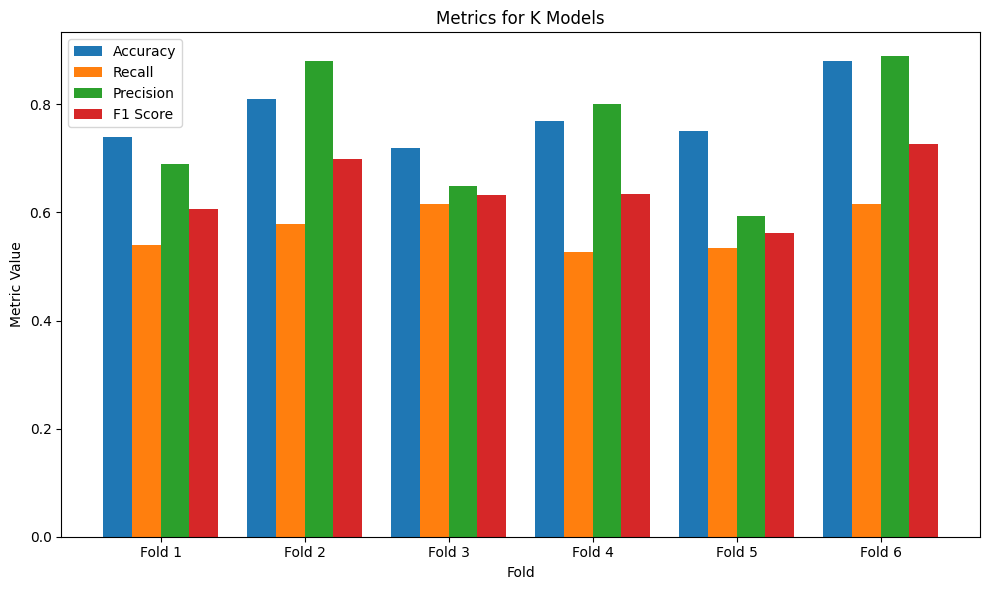

In [225]:
import matplotlib.pyplot as plt

# Plot barplot of metrics
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(K)

rects1 = ax.bar(index, accuracies, bar_width, label='Accuracy')
rects2 = ax.bar(index + bar_width, recalls, bar_width, label='Recall')
rects3 = ax.bar(index + 2*bar_width, precisions, bar_width, label='Precision')
rects4 = ax.bar(index + 3*bar_width, f1_scores, bar_width, label='F1 Score')

ax.set_xlabel('Fold')
ax.set_ylabel('Metric Value')
ax.set_title('Metrics for K Models')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels([f'Fold {i+1}' for i in range(K)])
ax.legend()

plt.tight_layout()
plt.show()


In [224]:
# Load testdata
#Loading Dataset
import numpy as np
import csv

#Loading Data
with open('q4testdata_999601410.csv', 'r') as f:
    reader = csv.reader(f)
    diabetes_data_testt = list(reader)
diabetes_data_test = np.array(diabetes_data_testt)

diabetes_data_test =  diabetes_data[1:,]
print(diabetes_data_test)

[['6' '96' '0' ... '23.7' '0.19' '28']
 ['1' '124' '74' ... '27.8' '0.1' '30']
 ['7' '150' '78' ... '35.2' '0.692' '54']
 ...
 ['5' '121' '72' ... '26.2' '0.245' '30']
 ['1' '126' '60' ... '30.1' '0.349' '47']
 ['1' '93' '70' ... '30.4' '0.315' '23']]


In [227]:
# Load the test data
with open('q4testdata_999601410.csv', 'r') as f:
    reader = csv.reader(f)
    diabetes_data_testt = list(reader)
diabetes_data_test = np.array(diabetes_data_testt)

#Predict testdata and save into test_result.csv
# Identify the fold with the highest F1 score
best_fold_index = np.argmax(f1_scores)
# Use the features and target variables from the sixth fold for training
X_train = np.concatenate((X[:5*fold_size], X[6*fold_size:]), axis=0)
y_train = np.concatenate((y[:5*fold_size], y[6*fold_size:]), axis=0)

# Train logistic regression model using the sixth fold
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the logistic regression model trained on the fold with the highest F1 score
best_model = LogisticRegression()
best_model.fit(X_train, y_train)



# Separate features (X_test) from the test data
X_test = diabetes_data_test[1:, :].astype(float)

# Predict on the test data using the best model
test_predictions = best_model.predict(X_test)

# Save the test predictions to a CSV file
test_results = np.column_stack((np.arange(1, len(test_predictions) + 1), test_predictions))
np.savetxt("AIML_2024_A1_22235_q4test.csv", test_results, delimiter=",", fmt="%d", header="ID,Outcome", comments="")

# # y_pred is name for prediction data
# np.savetxt('test_result.csv', y_pred, fmt='%s')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c